In [93]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score
%matplotlib inline

In [3]:
covid_data = pd.read_csv("C:/Users/Jad/Desktop/Projects/df_covid_recovered.csv")
covid_data = covid_data.rename(columns = {"Country/Region" : "Country"})
covid_data["All Recoveries"] = covid_data.sum(axis=1)
covid_data

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,04/04/2020,04/05/2020,04/06/2020,04/07/2020,04/08/2020,04/09/2020,04/10/2020,04/11/2020,04/12/2020,All Recoveries
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,10,15,18,18,29,32,32,32,32,269
1,Albania,0,0,0,0,0,0,0,0,0,...,99,104,116,131,154,165,182,197,217,1838
2,Algeria,0,0,0,0,0,0,0,0,0,...,90,90,90,113,237,347,405,460,591,3201
3,Andorra,0,0,0,0,0,0,0,0,0,...,21,26,31,39,52,58,71,71,128,570
4,Angola,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,4,4,26
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Argentina,0,0,0,0,0,0,0,0,0,...,279,280,325,338,358,365,375,440,468,4873
7,Armenia,0,0,0,0,0,0,0,0,0,...,43,57,62,87,114,138,149,173,197,1332
8,Australia,0,0,0,0,0,0,0,0,0,...,18,28,40,40,40,47,59,59,59,438
9,Australia,0,0,0,0,0,0,0,0,2,...,4,4,4,4,4,4,4,4,4,268


In [4]:
morocco = covid_data[(covid_data.Country == "Morocco")]
morocco = morocco.reset_index().drop(columns = "index")
morocco

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,04/04/2020,04/05/2020,04/06/2020,04/07/2020,04/08/2020,04/09/2020,04/10/2020,04/11/2020,04/12/2020,All Recoveries
0,Morocco,0,0,0,0,0,0,0,0,0,...,66,76,81,93,97,109,122,146,177,1196


In [4]:
morocco.to_csv("morocco_covid.csv")

In [5]:
morocco_covid = pd.read_csv("C:/Users/Jad/Desktop/Projects/morocco_covid.csv")
france_covid = pd.read_csv("C:/Users/Jad/Desktop/Projects/France_covid.csv")
morocco_covid

,Dates,Confirmed,Confirmed per day
0,02/03/2020,1,1
1,03/03/2020,1,0
2,04/03/2020,1,0
3,05/03/2020,2,1
4,06/03/2020,2,0
5,07/03/2020,2,0
6,08/03/2020,2,0
7,09/03/2020,2,0
8,10/03/2020,3,1
9,11/03/2020,5,2


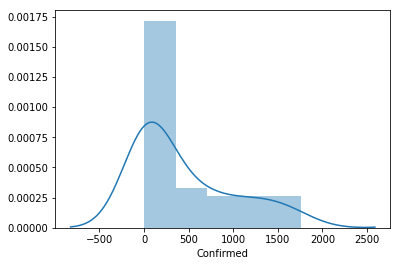

In [6]:
sns.distplot(morocco_covid["Confirmed"])

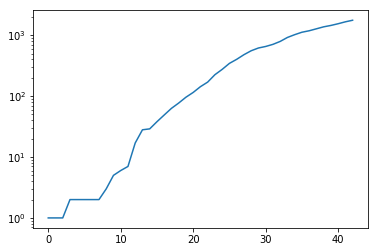

In [7]:
plt.plot(morocco_covid['Confirmed'])
plt.yticks(np.arange(100,2000, step=100))
plt.yscale("log")

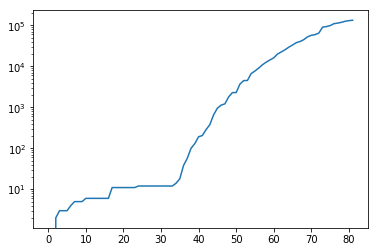

In [8]:
plt.plot(france_covid['Confirmed'])
plt.yticks(np.arange(10000,150000, step=10000))
plt.yscale("log")

In [9]:
days = np.array([i for i in range(len(morocco_covid))]).reshape(-1, 1)
total_cases = np.array(morocco_covid["Confirmed"]).reshape(-1, 1)

In [14]:
start = '02/03/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

In [20]:
days_in_future = 60
future_forcast = np.array([i for i in range(len(morocco_covid)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(days,total_cases, test_size=0.20, random_state=0)

In [96]:
linear_model = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=None)
linear_model.fit(X_train, y_train)
test_linear_pred = linear_model.predict(X_test)
linear_pred = linear_model.predict(future_forcast)
print("MAE:", mean_absolute_error(test_linear_pred, y_test))
print("MSE:", mean_squared_error(test_linear_pred, y_test))
linear_model.score(X_test,y_test)

MAE: 157.43697394157368
MSE: 31448.535608669063


0.8474097058342294

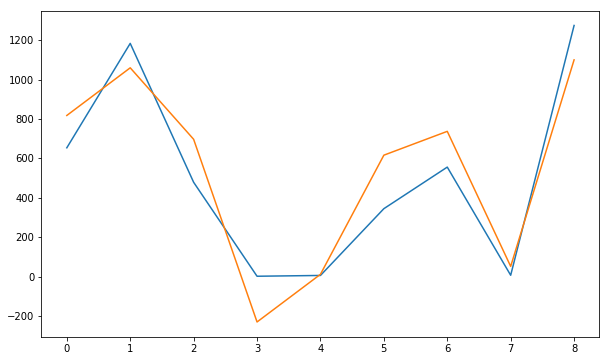

In [77]:
plt.figure(figsize=(10,6))
plt.plot(y_test)
plt.plot(test_linear_pred)

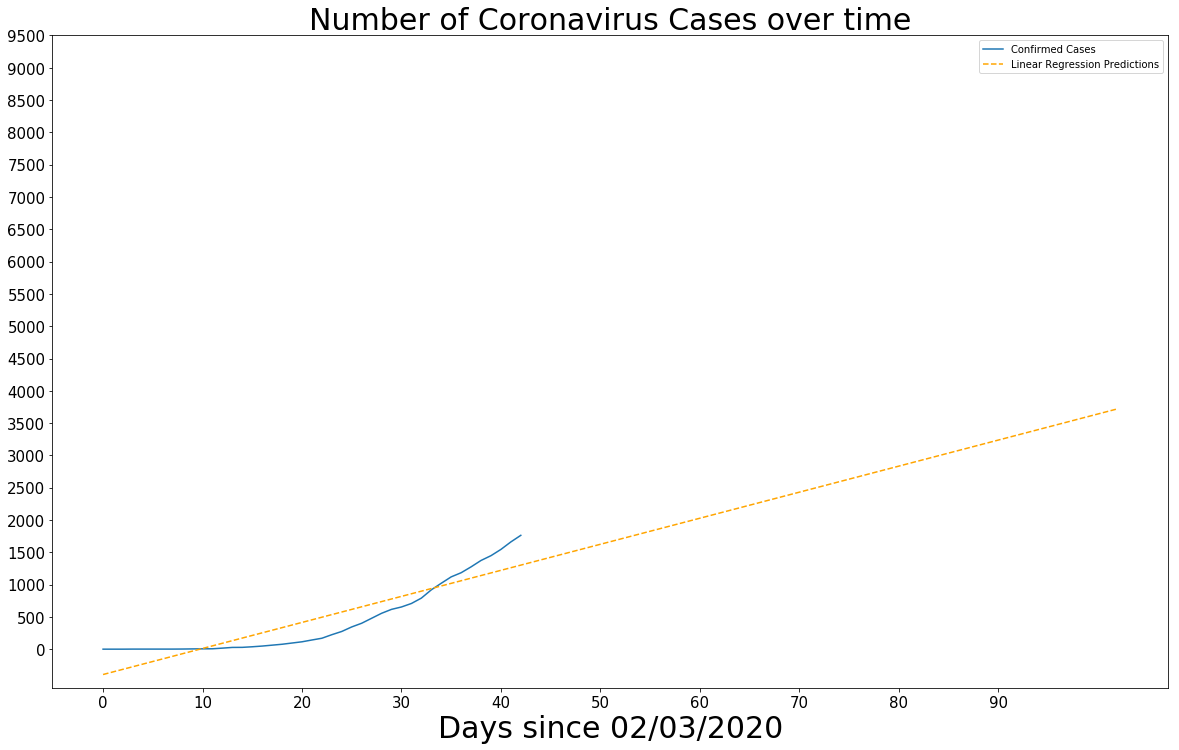

In [80]:
plt.figure(figsize=(20,12))
plt.plot(morocco_covid["Confirmed"])
plt.plot(future_forcast, linear_pred,linestyle="dashed", color='orange')
plt.title("Number of Coronavirus Cases over time", size=30)
plt.xlabel('Days since 02/03/2020', size=30)
plt.legend(["Confirmed Cases", 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xticks(np.arange(0, 100, step=10))
plt.yticks(np.arange(0, 10000, step=500))
plt.show()

In [74]:
# print("Linear Regression future predictions:")
print(linear_pred[0:30])

[[-391.42059436]
 [-351.10217679]
 [-310.78375923]
 [-270.46534166]
 [-230.1469241 ]
 [-189.82850653]
 [-149.51008896]
 [-109.1916714 ]
 [ -68.87325383]
 [ -28.55483627]
 [  11.7635813 ]
 [  52.08199886]
 [  92.40041643]
 [ 132.718834  ]
 [ 173.03725156]
 [ 213.35566913]
 [ 253.67408669]
 [ 293.99250426]
 [ 334.31092182]
 [ 374.62933939]
 [ 414.94775696]
 [ 455.26617452]
 [ 495.58459209]
 [ 535.90300965]
 [ 576.22142722]
 [ 616.53984479]
 [ 656.85826235]
 [ 697.17667992]
 [ 737.49509748]
 [ 777.81351505]]


In [75]:
morocco_covid[0:30]

,Dates,Confirmed,Confirmed per day
0,02/03/2020,1,1
1,03/03/2020,1,0
2,04/03/2020,1,0
3,05/03/2020,2,1
4,06/03/2020,2,0
5,07/03/2020,2,0
6,08/03/2020,2,0
7,09/03/2020,2,0
8,10/03/2020,3,1
9,11/03/2020,5,2
